# A Note: How Much Difference Does Heterogeneity Make in the Susceptible, Infected, Recovered (or Not) Model?

It turns out it makes a significant amount of difference:

&nbsp;

## The Basic Model

### The Framework

Assume a continuum of people, indexed by j ∈ [0, 1]. 

* For each j there is a measure of how gregarious/vulnerable the people at that j are: how many others they instantaneously contact: $ g_j $. 

* For each j, there are measures of how many of the people at that j are currently, at each time t, susceptible, infected, and recovered: $ s_{jt} +  i_{jt} + r_{jt} = 1 $.

* People recover from being infected at rate $ \rho $ (including dying): $ \frac{dr_{jt}}{dt} = \rho i_{jt} $

* A fraction $ \delta $ of the recovered are dead: $ d_{jt} = \delta r_{jt} $

* People get infected if they are susceptible and if one of the $ g_j $ they contact is currently infected: $\frac{di_{jt}}{dt} = g_j s_{jt} I_t - \rho i_{jt} $

* The total number of currently infected: $ I_t = \int_0^1 {i_{jt} dj} $ 

* The total number of currently recovered: $ R_t = \int_0^1 {r_{jt} dj} $

* The total number of currently susceptiable: $ S_t = \int_0^1 {s_{jt} dj} $

* The total number of currently dead is: $ D_t = \delta R_t $

&nbsp;

### Initial Conditions

* Initially, before the epidemic: $ s_{j0} = S_0 = 1 - I_0 $

* Initially, before the epidemic: $ r_{j0} = R_0 = 0 $

* Initially, before the epidemic: $ i_{j0} = I_0  $

&nbsp;

### Parameters

There is one initial infection rate $ I_0 $, one recovery rate $ \rho $, one share of the recovered who are dead $ \delta $, and a continuum of gregarious/vulnerable rates $ g_j $.

For simplicity let us cut our number of parameters to five and assign the $ g_j $ linearly based on two end parameters $ g_{min} $ and $ g_{max} $: $ g_j = j \left( g^{max} \right) + (1-j) \left( g^{min} \right) $

&nbsp;

---

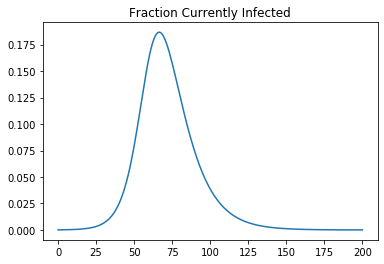

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# paramaters

time = 200                    # time periods we run the simulation for
bins = 101                    # number of bins into which the population is divided

R_zero_min = 0.0              # R_0 for least gregarious/infective
R_zero_max = 5.0              # R_0 for most gregarious/infective

rho = 0.1                     # recovery rate
g_min = R_zero_min * rho      # minimum gregariousness/infectiveness
g_max = R_zero_max * rho      # maximum gregariousness/infectiveness
delta = 0.01                  # death rate

I_zero = 0.0001               # initial infection rate

# averages over the population at the current moment of S, I, R—
# susceptible, infected, recovered (or dead), initialized to their
# time-zero values
I_tavg = I_zero 
R_tavg = 0
S_tavg = 1 - I_zero

# time series for the entire population of the fractions S, I, R;
# initialized with their time-zero values
T_pop = [0]
R_pop = [R_tavg]
I_pop = [I_tavg]
S_pop = [S_tavg]

# heterogeneity across the population in gregariousness/infectiveness
G = np.linspace(g_min, g_max, 101)

# initial conditions across the population, for all j:
R_0 = 0*G
I_0 = 0*G + I_zero
S_0 = 1 - I_zero

# arrays to hold current-time population heterogeneity—all j at the current
# moment of time—initialized to their values at time zero:
R = R_0
I = I_0
S = S_0

# arrays to hold all the numbers—for all j, and for all t—for when we want
# to look at them later:
R_array = [R]
I_array = [I]
S_array = [S]

# loop to calculate all the numbers:
for t in range(0, time):    
    R = R + rho * I
    I = (1-rho) * I + I_tavg * G * S
    S = - (R + I - 1) 
    
    # subloop to calculate average S, I, R across all j at the current
    # moment of time:
    I_tavg = 0
    R_tavg = 0
    S_tavg = 0
    for j in range(0, bins):
        I_tavg = I_tavg + I[j]/bins 
        R_tavg = R_tavg + R[j]/bins
        S_tavg = S_tavg + S[j]/bins

    # update the full arrays with the current numbers for all j:
    R_array = R_array + [R]
    I_array = I_array + [I]
    S_array = S_array + [S]
    
    # update the time series of population averages:
    T_pop = T_pop + [t+1]
    R_pop = R_pop + [R_tavg]
    S_pop = S_pop + [S_tavg]
    I_pop = I_pop + [I_tavg]

pd.DataFrame(I_pop).plot(title = "Fraction Currently Infected", legend = False)

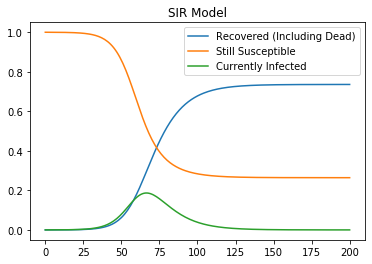

In [2]:
Results = [R_pop, S_pop,I_pop]
Results_df = pd.DataFrame(Results).transpose()
Results_df.columns = ["Recovered (Including Dead)", "Still Susceptible", "Currently Infected"]

Results_df.plot(title="SIR Model")

In [3]:
S_tavg

0.2641891122421484

## Results

<img src="https://delong.typepad.com/img/r0-2_5-for-everyone.png" width="300" /> <img src="https://delong.typepad.com/img/r0-from-2_5-to-5.png" width="300" />

So instead of doing my day job this afternoon, I began wondering about how much the Susceptible, Infected, Recovered (or Not)'s suppression of individual heterogeneity affects its conclusions. Suppose that people have different amounts of gregariousness/infectiveness so that if everyone were like the most gregarious and vulnerable people the R_0 for the epidemic would be 5, and if everyone were like the least gregarious and vulnerable people the R_0 for the epidemic would be 0, with the population varying linearly between those extremes. How much different would the course of the epidemic be than for a society where everyone was identical and R_0 was 2.5?

The answer is: substantial. If I have not made a mistake in my model-building or my python code—always an "if"—then the difference is substantial: 26% of the population escapes the epidemic for $ R_0 $ distributed between 0 and 5 with an average of 2.5. Only 10% escapes the epidemic if everyone's $ R_0 $ is 2.5. 

The intuition is clear: By the time half of the population has been infected, an overwhelming number of those with high R_0's have been infected. Thus those who are still susceptible have personal R_0's much lower than the average. In the early stages, however—before any noticeable component of the population has been infected—the course of the epidemic tracks the average R_0 very closely. It is when it begins to fall off the exponential that the differences become apparent: not only are some of those who would be infected by exponential growth now immune (or dead), but those left who could be infected have lower R_0's than the average.

----

&nbsp;

## <font color="880000"> Note: Coronavirus Heterogeneity </font>

<img src="https://tinyurl.com/20181029a-delong" width="300" style="float:right" />

* Ask me two questions…
* Make two comments…
* Further reading…

<br clear="all" />

----

weblog support: <https://github.com/braddelong/weblog-support/blob/master/coronavirus-r0-heterogeneity.ipynb>        
nbViewer: <https://nbviewer.jupyter.org/github/braddelong/weblog-support/blob/master/coronavirus-r0-heterogeneity.ipynb>       
datahub: <http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=weblog-support&branch=master&path=coronavirus-r0-heterogeneity.ipynb>    

&nbsp;

----